In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

In [15]:
def confusion_mat(confusion):
    TN = confusion[0][0]
    FN = confusion[1][0]
    TP = confusion[1][1]
    FP = confusion[0][1]
    sensitivity_test = TP/(TP+FN)*100
    specificity_test = TN/(FP+TN)*100
    return sensitivity_test,specificity_test

## **Reading Titanic.csv file and filling the missing values using the mean of each column**

In [16]:
Survived={}
Fatalities={}
df=pd.read_csv("Titanic.csv")
df.drop(df.columns[[0]], axis=1, inplace=True)
df=df[["pclass","sex","age","sibsp","survived"]]
df["pclass"]=df["pclass"].map({"1st":1,"2nd":2,"3rd":3})
df["sex"]=df["sex"].map({"female":1,"male":0})
df["age"].fillna((df["age"].mean()),inplace=True)
df= df.dropna()
X= df.iloc[:,:-1]
y=df.iloc[ : ,-1:]

## **Scaling the data so that all the columns are on the the same scale. Performed this to get age in the same scale**

In [17]:
scaler = StandardScaler()  
scaler.fit(X)
df1 = pd.DataFrame(scaler.transform(X))

## **Spliting the data into train and test (80-20 split)**

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df1, y, test_size=0.2,random_state=42)

**First taking solver = SGD, number of hidden layer neuron = 5. and keeping learning rate as adaptive**

In [19]:
classifier = MLPClassifier(solver='sgd',hidden_layer_sizes=(5,2),activation='logistic',learning_rate='adaptive',
                           learning_rate_init=0.1,alpha=0.000000001, momentum=0.5)
classifier = classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.767175572519084

In [20]:
conf_matrix = confusion_matrix(y_test, y_pred)
sensitivity_test,specificity_test=confusion_mat(conf_matrix)

Survived["Survived_ANN_5"]=sensitivity_test
Fatalities["Fatalities_ANN_5"]=specificity_test

In [21]:
print("\033[1m",f"Out of sample percent survivors correctly predicted on Test Set for 5 hidden neuron= {(sensitivity_test):.3f}","\033[0m" )
print("\033[1m",f"Out of sample percent fatalities correctly predicted on Test Set for 5 hidden neuron= {(specificity_test):.3f}","\033[0m" )

 Out of sample percent survivors correctly predicted on Test Set for 5 hidden neuron= 62.712 
 Out of sample percent fatalities correctly predicted on Test Set for 5 hidden neuron= 88.194 


**Now training another MLP with number of hidden layer neuron = 100 and keeping other parameters same as before**

In [22]:
classifier = MLPClassifier(solver='sgd',hidden_layer_sizes=(50,2),activation='logistic',learning_rate='adaptive',
                           learning_rate_init=0.1,alpha=0.000000001, momentum=0.5)
classifier = classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.767175572519084

In [23]:
conf_matrix = confusion_matrix(y_test, y_pred)
sensitivity_test,specificity_test=confusion_mat(conf_matrix)
Survived["Survived_ANN_50"]=sensitivity_test
Fatalities["Fatalities_ANN_50"]=specificity_test

In [24]:
print("\033[1m",f"Out of sample percent survivors correctly predicted on Test Set for 100 hidden neuron = {(sensitivity_test):.3f}","\033[0m" )
print("\033[1m",f"Out of sample percent fatalities correctly predicted on Test Set for 100 hidden neuron= {(specificity_test):.3f}","\033[0m" )

 Out of sample percent survivors correctly predicted on Test Set for 100 hidden neuron = 60.169 
 Out of sample percent fatalities correctly predicted on Test Set for 100 hidden neuron= 90.278 


##Here when we increase the number of hidden layer neuron from 5 to 50, doesn't change much that means for our data we require very less number of neuron i neach hidden layer to predict the data correctly. These means for our data we do not need many hidden neuron to predict the data and the task can be done using only a few of them. These results not only depend on the number of neurons but also on the other parameters such as the alpha and momentum chossen. For my model modifying alpha is not affecting my model by much but the change of gradient descent when decreased the accuracy increases which might also tell us that the model is overfitting.

**Re-evaluating the random forest using max node=5 which was calculated during homework 3**

In [25]:
clf = DecisionTreeClassifier(criterion='gini',max_leaf_nodes=5)
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [26]:
conf_matrix = confusion_matrix(y_test, y_pred)
sensitivity_test,specificity_test=confusion_mat(conf_matrix)
Survived["Survived_RF"]=sensitivity_test
Fatalities["Fatalities_RF"]=specificity_test

In [27]:
print("\033[1m",f"Out of sample percent survivors correctly predicted on Test Set for Random Forest= {(sensitivity_test):.3f}","\033[0m" )
print("\033[1m",f"Out of sample percent fatalities correctly predicted on Test Set for Random Forest= {(specificity_test):.3f}","\033[0m" )

 Out of sample percent survivors correctly predicted on Test Set for Random Forest= 46.610 
 Out of sample percent fatalities correctly predicted on Test Set for Random Forest= 97.222 


Plotting all the accuracy for both survided and Fatalities achieved from both 5 count neural netwrok hidden layer, 100 count neural network hidden layer and using the Ranfom forest having max leaves node = 5





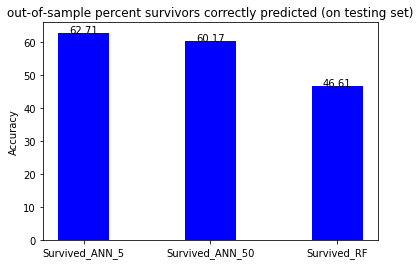

In [28]:

plt.bar(Survived.keys(), Survived.values(), color ='blue',width = 0.4)

 
for i in range(len(list(Survived.keys()))):
        plt.text(i, list(Survived.values())[i], round((list(Survived.values())[i]),2), ha = 'center')


plt.ylabel("Accuracy")
plt.title("out‐of‐sample percent survivors correctly predicted (on testing set)")
plt.show()

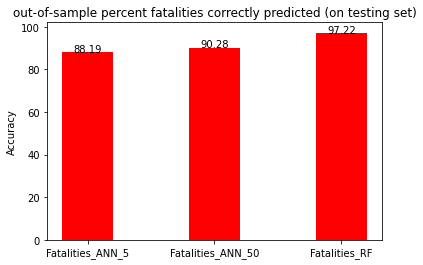

In [29]:
plt.bar(Fatalities.keys(), Fatalities.values(), color ='red',width = 0.4)

 
for i in range(len(list(Fatalities.keys()))):
        plt.text(i, list(Fatalities.values())[i], round((list(Fatalities.values())[i]),2), ha = 'center')


plt.ylabel("Accuracy")
plt.title("out-of‐sample percent fatalities correctly predicted (on testing set)")
plt.show()

In [32]:
df = pd.DataFrame(columns=['Parameter', 'Pruned DT', '5 HL NN','50 HL NN'])
df = df.append({'Parameter': 'out‐of‐sample percent survivors correctly predicted (on testing set)', 'Pruned DT':Survived["Survived_RF"], '5 HL NN': Survived["Survived_ANN_50"],'50 HL NN':Survived["Survived_ANN_5"]}, ignore_index=True)
df = df.append({'Parameter': 'out-of‐sample percent fatalities correctly predicted (on testing set)', 'Pruned DT': Fatalities["Fatalities_RF"], '5 HL NN': Fatalities["Fatalities_ANN_50"],'50 HL NN':Fatalities["Fatalities_ANN_5"]}, ignore_index=True)
pd.set_option('display.max_colwidth', -1)
df

,Parameter,Pruned DT,5 HL NN,50 HL NN
0,out‐of‐sample percent survivors correctly predicted (on testing set),46.610169,60.169492,62.711864
1,out-of‐sample percent fatalities correctly predicted (on testing set),97.222222,90.277778,88.194444


 *The above results clearly shows that Ann was better able to predict the Survived cases in respect to RF and also the Fatalities calculated are very close by though RF had a higher accuracy in the prediction of Fatalities. So in general the Titanic Dataset can be better predicted using the ANN model then RF.*